/Users/wakeliu/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/wakeliu/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


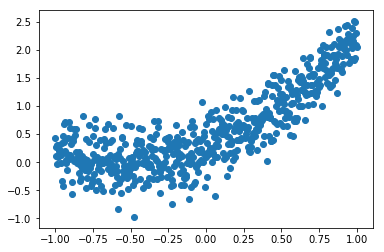

In [ ]:
from __future__ import print_function
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('Agg')


# Make up some real data
x_data = np.linspace(-1,1,600)[:, np.newaxis]
noise = np.random.normal(0, 0.3, x_data.shape)
y_data = np.square(x_data + 0.5) + noise

lr = 0.01 # learning rate

# define placeholder for inputs to network
xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])

# add hidden layer
w1 = tf.Variable(tf.random_normal([1, 10]))
b1 = tf.Variable(tf.zeros([1, 10]) + 0.1)
l1 = tf.nn.relu(tf.matmul(xs, w1) + b1)

w2 = tf.Variable(tf.random_normal([10, 1]))
b2 = tf.Variable(tf.zeros([1, 1]) + 0.1)
prediction = tf.matmul(l1, w2) + b2

# the error between prediciton and real data
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction), reduction_indices=[1]))

train = tf.train.GradientDescentOptimizer(lr).minimize(loss)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    # plot the real data
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(x_data, y_data)
    plt.ion()
    plt.show()

    for i in range(1000):
        # training
        sess.run(train, feed_dict={xs: x_data, ys: y_data})
        if i % 50 == 0:
            # to visualize the result and improvement
            try:
                ax.lines.remove(lines[0])
            except Exception:
                pass
            val = sess.run(prediction, feed_dict={xs: x_data})
            # plot the prediction
            lines = ax.plot(x_data, val, 'r-', lw=5)
            plt.pause(0.5)

input('')
